Trabalho de Tópicos Especiais

    Nome dos Alunos: Luiz e Eduardo Albornoz
    Tema: Housing privisões de imóveis
    Link do Dataset:https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset
    CSV Escolhido: Flood.csv
    Escolha: Previsão

Importações

In [ ]:
from patsy import dmatrices
from xgboost import XGBRegressor
from xgboost import plot_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats

Correlações, Definições de Variáveis Alvo e Explicativas

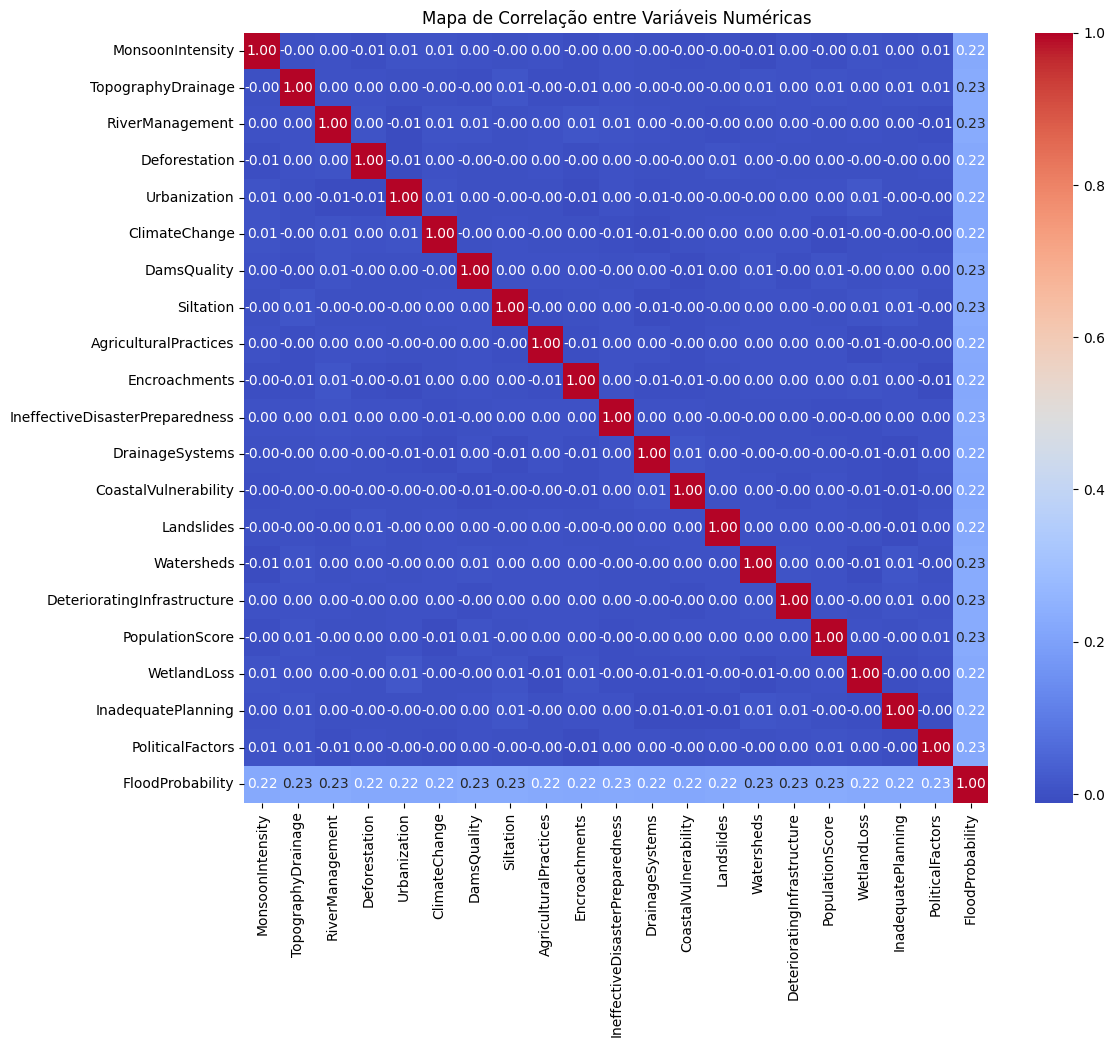

In [ ]:
dataFrame = pd.read_csv('flood.csv', header=0)
df_numerico = dataFrame.select_dtypes(include='number')

matriz_correlacao = df_numerico.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()

y = dataFrame['ClimateChange']

X = dataFrame.drop(columns=['ClimateChange'])

Normalizações e Tratamentos

In [ ]:
if (dataFrame['ClimateChange'] <= 0).any():
    constante_adicionar = 1
    dataFrame['ClimateChange_secondary'] = dataFrame['ClimateChange'] + constante_adicionar
else:
    dataFrame['ClimateChange_secondary'] = dataFrame['ClimateChange']

dataFrame['ClimateChange_boxcox'], lambda_boxcox = stats.boxcox(dataFrame['ClimateChange_secondary'])

print(stats.shapiro(dataFrame['ClimateChange_boxcox']))
if stats.shapiro(dataFrame['ClimateChange_boxcox'])[1] > 0.05:
  print ("Distribuição normal")
else:
  print ("Distribuição não normal")
  print(stats.shapiro(dataFrame['ClimateChange_boxcox'])[1])

ShapiroResult(statistic=np.float64(0.9812330690211137), pvalue=np.float64(1.776782045762274e-59))
Distribuição não normal
1.776782045762274e-59


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50000.
  res = hypotest_fun_out(*samples, **kwds)


Árvore de Decisão ou Gráfico Explicativo

In [ ]:
expr = """ClimateChange ~ TopographyDrainage +	RiverManagement	+ Deforestation +	Urbanization +
	MonsoonIntensity + 	DamsQuality +	Siltation +	AgriculturalPractices +	Encroachments +
  	DrainageSystems	+ CoastalVulnerability	+ Landslides +	Watersheds +	DeterioratingInfrastructure	 +
     PopulationScore + 	WetlandLoss	+ InadequatePlanning +	PoliticalFactors +	FloodProbability"""
selec = np.random.rand(len(dataFrame)) < 0.8
df_teste = dataFrame[~selec]
df_treino = dataFrame[selec]
y_treino, X_treino = dmatrices(expr, df_treino, return_type='dataframe')
y_teste, X_teste = dmatrices(expr, df_teste, return_type='dataframe')

model = XGBRegressor(verbosity=0, n_jobs=-1)
model.fit(X_treino, y_treino, verbose=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

XGBOOST

Score (R²) - treino: 0.58
RMSE: 1.92


<Figure size 1000x600 with 0 Axes>

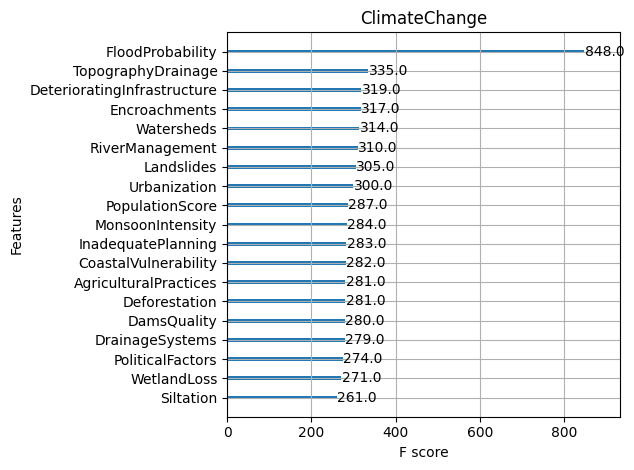

In [ ]:
score = model.score(X_treino, y_treino)
print(f"Score (R²) - treino: {score:.2f}")

y_pred = model.predict(X_teste)

mse = mean_squared_error(y_teste.values.ravel(), y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='weight', show_values=True)
plt.title("ClimateChange")
plt.tight_layout()
plt.show()

Este trabalho mostrou como a tecnologia pode ajudar a prever enchentes com base em dados ambientais e sociais. com  o uso do XGBOOST, conseguimos identificar  os fatores que mais influenciam o problema, como desmatamento, urbanização e e falta de drenagem.